In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [8]:
# Cell DEBUG: Verifica struttura directory
import os

# Vedi cosa c'è in data/chexpert
chexpert_path = Path("../data/chexpert")
print(f"Contents of {chexpert_path}:")
print(list(chexpert_path.iterdir()))

# Cerca ricorsivamente i file .jpg
print("\nSearching for .jpg files...")
jpg_files = list(chexpert_path.rglob("*.jpg"))
print(f"Found {len(jpg_files)} .jpg files")

if jpg_files:
    print(f"\nFirst few image paths:")
    for f in jpg_files[:3]:
        print(f"  {f}")

Contents of ../data/chexpert:
[PosixPath('../data/chexpert/valid'), PosixPath('../data/chexpert/valid.csv'), PosixPath('../data/chexpert/train'), PosixPath('../data/chexpert/train.csv')]

Searching for .jpg files...
Found 223649 .jpg files

First few image paths:
  ../data/chexpert/valid/patient64733/study1/view1_frontal.jpg
  ../data/chexpert/valid/patient64734/study1/view1_frontal.jpg
  ../data/chexpert/valid/patient64702/study1/view1_frontal.jpg


In [2]:
data_path = Path("../data/chexpert")
train_df = pd.read_csv(data_path / "train.csv")
valid_df = pd.read_csv(data_path / "valid.csv")

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(valid_df)}")
print(f"\nColumns: {train_df.columns.tolist()}")

Training samples: 223414
Validation samples: 234

Columns: ['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


In [9]:
# Fix paths e salva CSV corretti
train_df['Path'] = train_df['Path'].str.replace('CheXpert-v1.0-small/', '')
valid_df['Path'] = valid_df['Path'].str.replace('CheXpert-v1.0-small/', '')

# Verifica
print("Paths fixed!")
print(f"Example path: {train_df.iloc[0]['Path']}")

# Ora prova a caricare immagine
img_path = Path("../data/chexpert") / train_df.iloc[0]['Path']
print(f"File exists: {img_path.exists()}")

Paths fixed!
Example path: train/patient00001/study1/view1_frontal.jpg
File exists: True


In [3]:
train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [4]:
pathology_columns = [
    'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
    'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation',
    'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
    'Pleural Other', 'Fracture', 'Support Devices'
]

# Conta valori per ogni pathology
print("Label distribution:")
for col in pathology_columns:
    if col in train_df.columns:
        print(f"\n{col}:")
        print(train_df[col].value_counts(dropna=False))

Label distribution:

No Finding:
No Finding
NaN    201033
1.0     22381
Name: count, dtype: int64

Enlarged Cardiomediastinum:
Enlarged Cardiomediastinum
 NaN    178575
 0.0     21638
-1.0     12403
 1.0     10798
Name: count, dtype: int64

Cardiomegaly:
Cardiomegaly
 NaN    177211
 1.0     27000
 0.0     11116
-1.0      8087
Name: count, dtype: int64

Lung Opacity:
Lung Opacity
 NaN    105636
 1.0    105581
 0.0      6599
-1.0      5598
Name: count, dtype: int64

Lung Lesion:
Lung Lesion
 NaN    211470
 1.0      9186
-1.0      1488
 0.0      1270
Name: count, dtype: int64

Edema:
Edema
 NaN    137458
 1.0     52246
 0.0     20726
-1.0     12984
Name: count, dtype: int64

Consolidation:
Consolidation
 NaN    152792
 0.0     28097
-1.0     27742
 1.0     14783
Name: count, dtype: int64

Pneumonia:
Pneumonia
 NaN    195806
-1.0     18770
 1.0      6039
 0.0      2799
Name: count, dtype: int64

Atelectasis:
Atelectasis
 NaN    154971
-1.0     33739
 1.0     33376
 0.0      1328
Name: coun

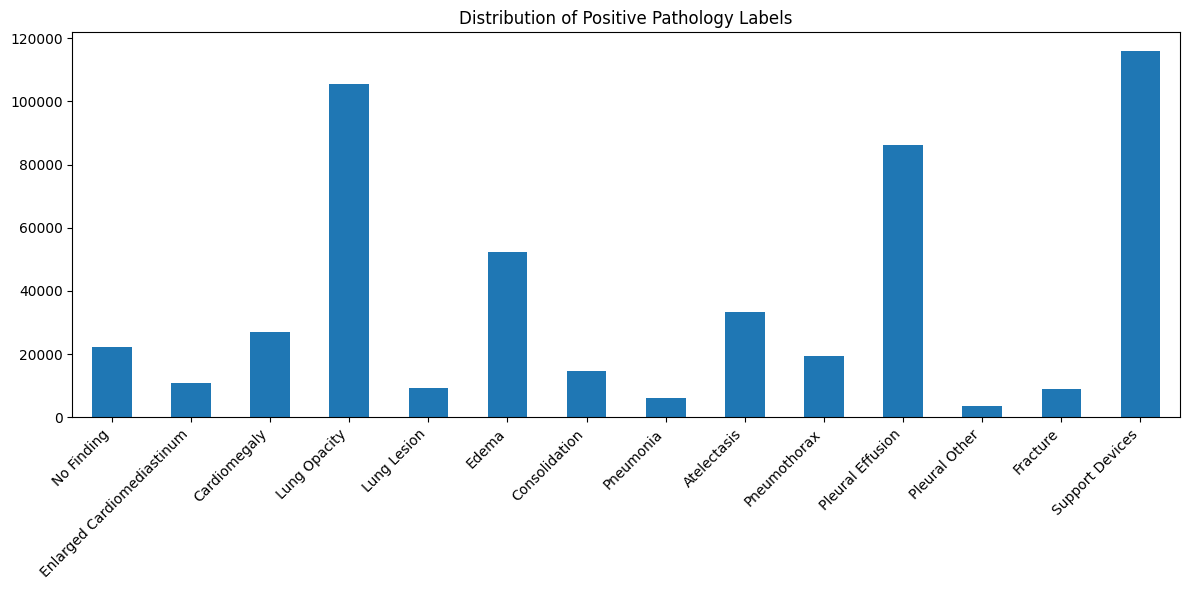

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
label_counts = train_df[pathology_columns].apply(lambda x: (x == 1.0).sum())
label_counts.plot(kind='bar', ax=ax)
plt.title("Distribution of Positive Pathology Labels")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Loading image from: ../data/chexpert/train/patient00001/study1/view1_frontal.jpg
File exists: True


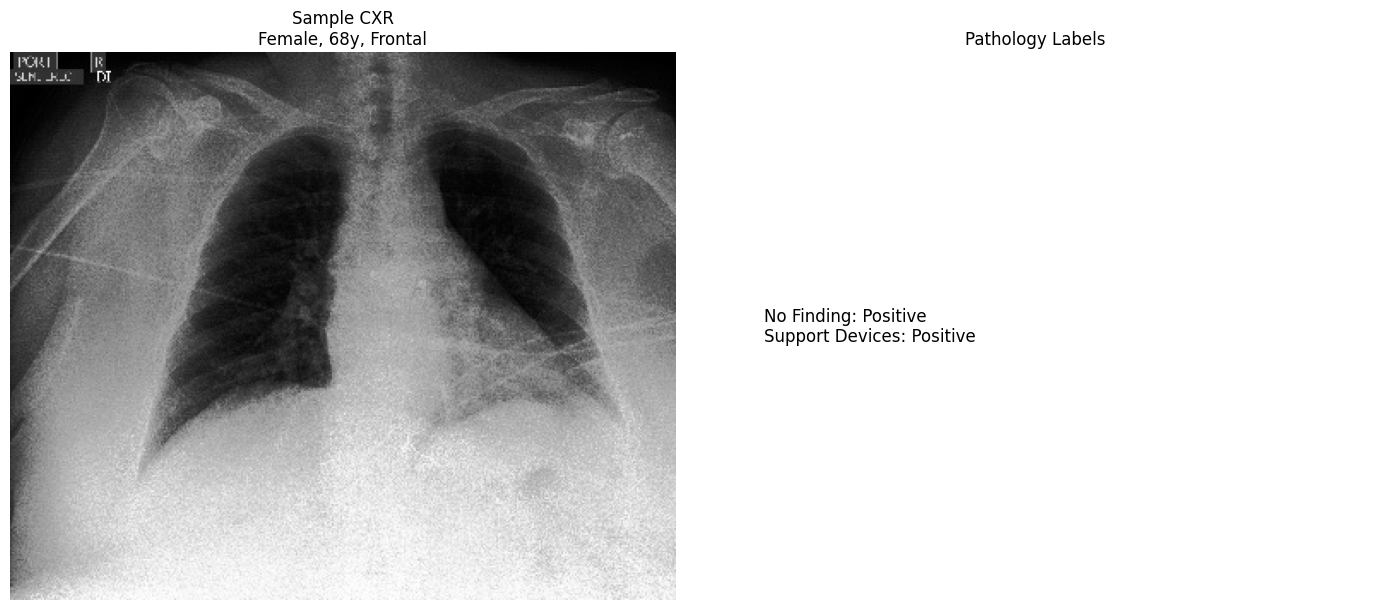

In [10]:
# Cell 6: Visualizza esempio di immagine (FIXED)
from PIL import Image

# Prendi primo sample
sample_row = train_df.iloc[0]

# FIX: Il path nel CSV è relativo, devi aggiungere il prefixo corretto
img_relative_path = sample_row['Path']
img_path = Path("../data/chexpert") / img_relative_path

print(f"Loading image from: {img_path}")
print(f"File exists: {img_path.exists()}")

if img_path.exists():
    img = Image.open(img_path)
    
    # Crea figura con info
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Immagine
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"Sample CXR\n{sample_row['Sex']}, {sample_row['Age']}y, {sample_row['Frontal/Lateral']}")
    ax[0].axis('off')
    
    # Labels
    findings = {}
    for col in pathology_columns:
        val = sample_row[col]
        if pd.notna(val) and val != 0:
            findings[col] = "Positive" if val == 1 else "Uncertain"
    
    findings_text = "\n".join([f"{k}: {v}" for k, v in findings.items()])
    if not findings_text:
        findings_text = "No findings"
    
    ax[1].text(0.1, 0.5, findings_text, fontsize=12, verticalalignment='center')
    ax[1].axis('off')
    ax[1].set_title("Pathology Labels")
    
    plt.tight_layout()
    plt.show()
else:
    print(f"ERROR: Image not found at {img_path}")
    print(f"Check your data directory structure")

In [ ]:
# Cell 7: Import synthetic note generator
import sys
sys.path.append('../src')

from data.synthetic_notes import SyntheticNoteGenerator

generator = SyntheticNoteGenerator()
print("SyntheticNoteGenerator imported successfully")

✅ SyntheticNoteGenerator imported successfully


In [16]:
# Cell 8: Genera note per i primi 5 esempi
print("=" * 80)
print("SYNTHETIC CLINICAL NOTES - Examples from CheXpert")
print("=" * 80)

for idx in range(5):
    row = train_df.iloc[idx]
    
    # Estrai labels
    labels = {col: row[col] for col in pathology_columns}
    
    # Genera nota
    note = generator.generate_note(labels)
    
    # Mostra risultato
    print(f"\n{'='*80}")
    print(f"SAMPLE {idx + 1}")
    print(f"Patient: {row['Sex']}, {row['Age']}y | View: {row['Frontal/Lateral']}")
    
    # Findings
    positive = [col for col in pathology_columns if row[col] == 1.0]
    uncertain = [col for col in pathology_columns if row[col] == -1.0]
    
    if positive:
        print(f"✓ Positive: {', '.join(positive)}")
    if uncertain:
        print(f"? Uncertain: {', '.join(uncertain)}")
    if not positive and not uncertain:
        print("○ No pathological findings")
    
    print(f"\n📝 Generated Clinical Note:")
    print(f'   "{note}"')
    print(f"{'='*80}")

SYNTHETIC CLINICAL NOTES - Examples from CheXpert

SAMPLE 1
Patient: Female, 68y | View: Frontal
✓ Positive: No Finding, Support Devices

📝 Generated Clinical Note:
   "Chief complaint: Routine chest evaluation. History: unremarkable medical history."

SAMPLE 2
Patient: Female, 87y | View: Frontal
✓ Positive: Lung Opacity, Fracture
? Uncertain: Cardiomegaly, Edema, Consolidation, Atelectasis, Pleural Effusion

📝 Generated Clinical Note:
   "Chief complaint: Patient presenting with dyspnea for several days. History: unremarkable medical history. Indication: Evaluate for lung opacity, fracture."

SAMPLE 3
Patient: Female, 83y | View: Frontal
✓ Positive: Lung Opacity, Fracture
? Uncertain: Consolidation

📝 Generated Clinical Note:
   "Chief complaint: Patient presenting with dyspnea for 3 days. History: no significant past medical history. Indication: Evaluate for lung opacity, fracture."

SAMPLE 4
Patient: Female, 83y | View: Lateral
✓ Positive: Lung Opacity, Fracture
? Uncertain: Consol

In [17]:
# Cell 9: Test su sample casuale con più pathologies
# Trova un caso interessante con multiple pathologies
multi_path_cases = train_df[
    (train_df['Cardiomegaly'] == 1.0) & 
    (train_df['Edema'] == 1.0) & 
    (train_df['Pleural Effusion'] == 1.0)
].head(3)

print("\n" + "=" * 80)
print("COMPLEX CASES (Multiple Pathologies)")
print("=" * 80)

for idx, row in multi_path_cases.iterrows():
    labels = {col: row[col] for col in pathology_columns}
    note = generator.generate_note(labels)
    
    positive = [col for col in pathology_columns if row[col] == 1.0]
    
    print(f"\nCase with: {', '.join(positive)}")
    print(f"Generated note: \"{note}\"")
    print("-" * 80)


COMPLEX CASES (Multiple Pathologies)

Case with: Cardiomegaly, Edema, Atelectasis, Pleural Effusion, Support Devices
Generated note: "Chief complaint: Patient presenting with fatigue and palpitations for several days. History: hypertension. Indication: Evaluate for cardiomegaly, edema."
--------------------------------------------------------------------------------

Case with: Cardiomegaly, Edema, Atelectasis, Pleural Effusion, Support Devices
Generated note: "Chief complaint: Patient presenting with fatigue and dyspnea for several days. History: coronary artery disease. Indication: Evaluate for cardiomegaly, edema."
--------------------------------------------------------------------------------

Case with: Cardiomegaly, Edema, Atelectasis, Pleural Effusion, Support Devices
Generated note: "Chief complaint: Patient presenting with dyspnea for 1 week. History: history of heart failure. Indication: Evaluate for cardiomegaly, edema."
----------------------------------------------------

In [18]:
# Cell: Verifica dati processati
processed_train = pd.read_csv("../data/processed/train_with_notes.csv")
processed_valid = pd.read_csv("../data/processed/valid_with_notes.csv")

print(f"✅ Processed train: {len(processed_train)} samples")
print(f"✅ Processed valid: {len(processed_valid)} samples")

print(f"\nColumns: {processed_train.columns.tolist()}")

# Mostra esempi di note
print("\n" + "="*80)
print("Sample clinical notes with their findings:")
print("="*80)

for i in range(5):
    row = processed_train.iloc[i]
    
    # Trova findings positivi
    positive = [col for col in pathology_columns if row[col] == 1.0]
    
    print(f"\n--- Sample {i+1} ---")
    if positive:
        print(f"Findings: {', '.join(positive)}")
    else:
        print("Findings: No positive findings")
    print(f"Note: {row['clinical_note']}")

✅ Processed train: 223414 samples
✅ Processed valid: 234 samples

Columns: ['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices', 'clinical_note']

Sample clinical notes with their findings:

--- Sample 1 ---
Findings: No Finding, Support Devices
Note: Chief complaint: Routine chest evaluation. History: unremarkable medical history.

--- Sample 2 ---
Findings: Lung Opacity, Fracture
Note: Chief complaint: Patient presenting with dyspnea for several days. History: no significant past medical history. Indication: Evaluate for lung opacity, fracture.

--- Sample 3 ---
Findings: Lung Opacity, Fracture
Note: Chief complaint: Patient presenting with chest discomfort and dyspnea for 5 days. History: unremarkable medical history. Indication: Evaluate for lung opacity, frac